## Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.



## The notebook consist of below 4 parts

* Data Understanding, Preparation, and Pre-Processing
* Exploratory Data Analysis 
* Feature Engineering and Variable Transformation
* Model Selection, Model Building, and  Prediction

### Data Understanding, Preparation, and Pre-Processing

#### Importing Libraries

In [1]:
import pandas as pd

In [2]:
#reading data
df=pd.read_csv("train (1).csv")

In [3]:
#checking shape of data
df.shape

(69999, 172)

In [4]:
## checking sample of data
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [5]:
#checking null values and data types in columns
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

##### The dataset has 135 float columns, 28 integer and 9 string type columns.
##### Out of 70k records, many columns have less than 20k values in them. They have only 25% of values. So we can drop them.

In [6]:
lst=[]
for i in df.columns:
    if int((df[i].isna().sum()/df.shape[0])*100)>70:
        lst.append(i)
print(len(lst),lst)

30 ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


##### Above 30 columns would be dropped as they dont have sufficient data

In [7]:
df.drop(columns=lst,axis=0,inplace=True)

In [8]:
#checking new shape
df.shape

(69999, 142)

In [9]:
#dropping rows having all null values
df=df.dropna(axis=0,how='all')

In [10]:
#checking new shape
df.shape

(69999, 142)

##### There is not change in rows of original dataset after dropping rows with all null values. This means no row has all null values in dataset.

##### Checking if in a columns all values are unique or contains a single not null value in all rows because these columns do not add much information to model

In [11]:
# calculating unique values of each column and checking on that
k=df.nunique()
j=k[(k.values ==1) | (k.values==69999)]
j.index

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [12]:
#dropping the columns 
df.drop(j.index,axis=1,inplace=True)

In [13]:
#checking new shape
df.shape

(69999, 128)

In [14]:
df['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

##### we can see that we have around 62K data for loyal customers and around 7k data for churned customer

In [15]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 128 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    arpu_6               69999 non-null  float64
 1    arpu_7               69999 non-null  float64
 2    arpu_8               69999 non-null  float64
 3    onnet_mou_6          67231 non-null  float64
 4    onnet_mou_7          67312 non-null  float64
 5    onnet_mou_8          66296 non-null  float64
 6    offnet_mou_6         67231 non-null  float64
 7    offnet_mou_7         67312 non-null  float64
 8    offnet_mou_8         66296 non-null  float64
 9    roam_ic_mou_6        67231 non-null  float64
 10   roam_ic_mou_7        67312 non-null  float64
 11   roam_ic_mou_8        66296 non-null  float64
 12   roam_og_mou_6        67231 non-null  float64
 13   roam_og_mou_7        67312 non-null  float64
 14   roam_og_mou_8        66296 non-null  float64
 15   loc_og_t2t_mou_6 

In [16]:
#checking on object data types
df[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/22/2014,7/10/2014,8/24/2014
1,6/12/2014,7/10/2014,8/26/2014
2,6/11/2014,7/22/2014,8/24/2014
3,6/15/2014,7/21/2014,8/25/2014
4,6/25/2014,7/26/2014,8/30/2014


In [17]:
##### converting string to dates
df['date_of_last_rech_6']=pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7']=pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8']=pd.to_datetime(df['date_of_last_rech_8'])

In [18]:
df['date_of_last_rech_7'].isna().sum()

1234

##### Filling null values in date columns with mode

In [19]:
df['date_of_last_rech_6'].fillna(value=df['date_of_last_rech_6'].mode(),inplace=True)
df['date_of_last_rech_7'].fillna(value=df['date_of_last_rech_7'].mode(),inplace=True)
df['date_of_last_rech_8'].fillna(value=df['date_of_last_rech_8'].mode(),inplace=True)

##### Filling all null values in data with mean of columns

In [20]:
for i in df.columns[df.isnull().sum()!=0]:
    df[i].fillna(value=df[i].mean(),inplace=True)

In [21]:
df.columns[df.isnull().sum()!=0]

Index([], dtype='object')

##### All null values were filled.

### Ending "Data Understanding, Preparation, and Pre-Processing" Section

### Exploratory Data Analysis

#### Importing EDA Libraries

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Univariate Analysis on numeric columns

C:\Users\Rebel\AppData\Local\Temp\ipykernel_18056\815717560.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 140))


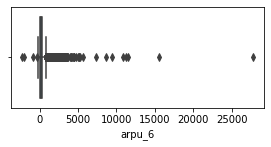

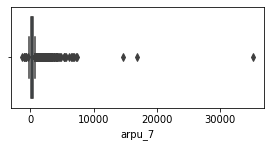

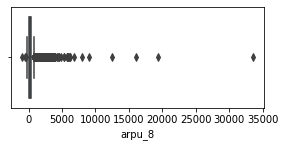

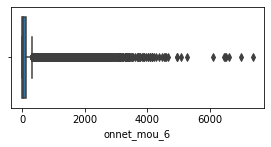

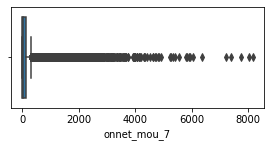

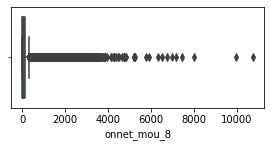

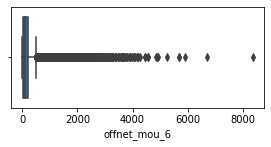

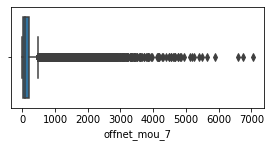

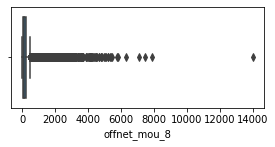

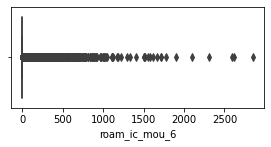

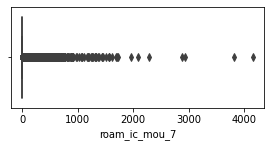

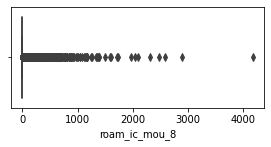

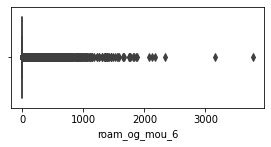

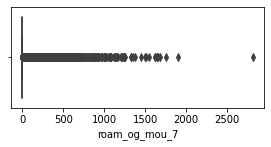

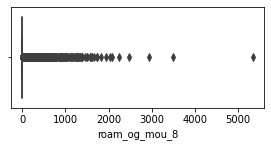

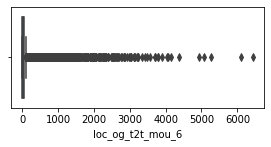

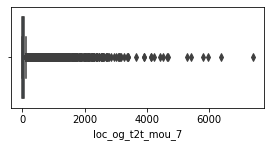

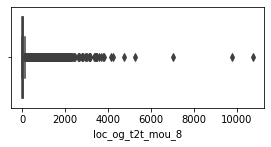

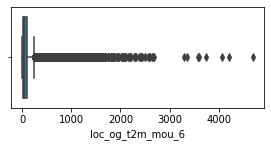

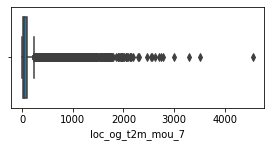

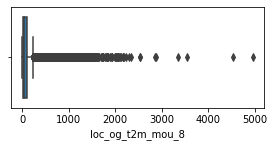

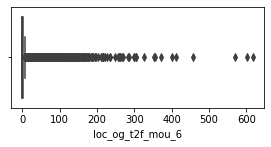

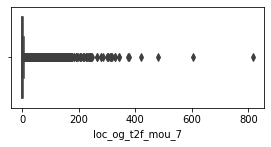

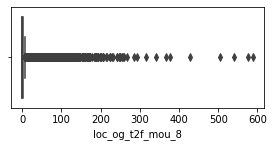

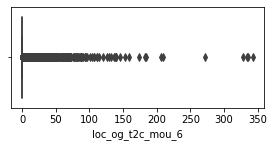

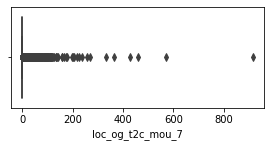

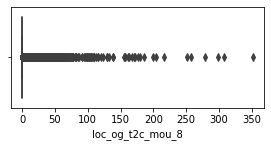

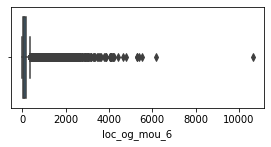

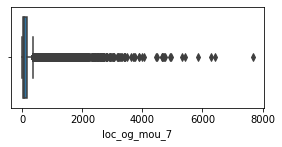

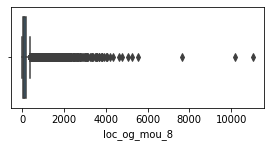

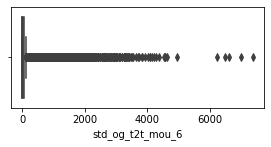

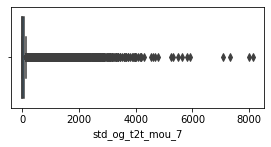

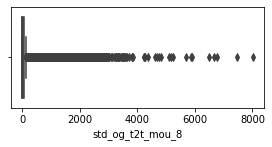

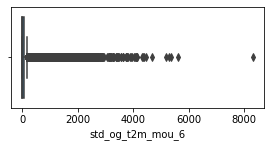

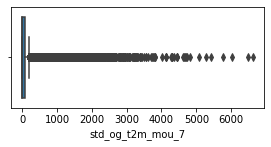

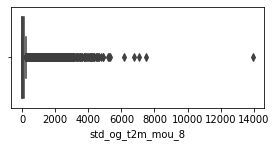

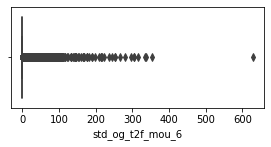

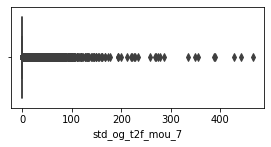

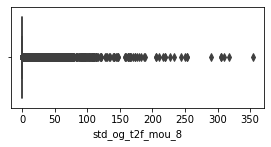

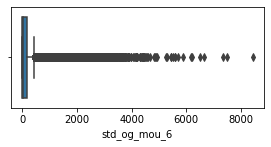

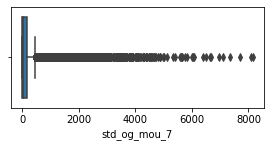

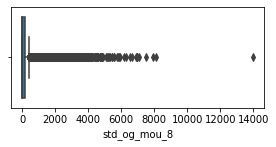

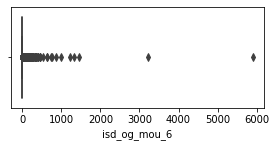

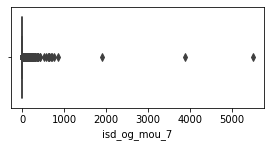

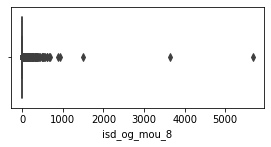

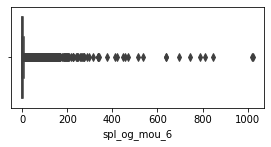

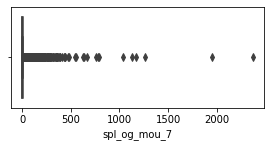

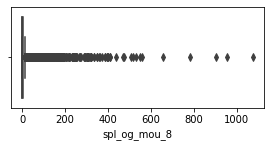

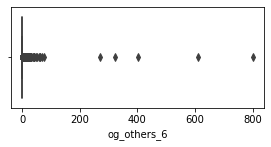

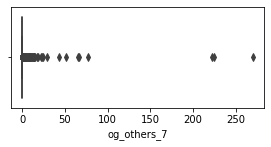

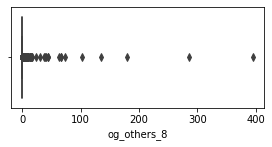

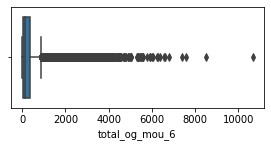

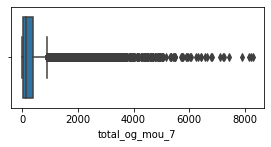

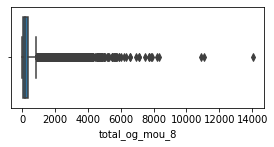

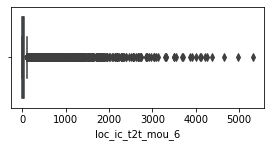

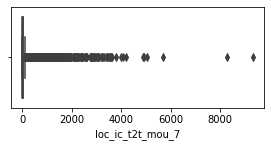

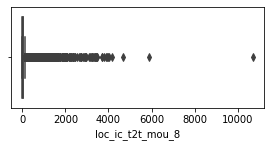

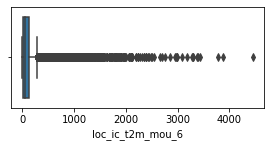

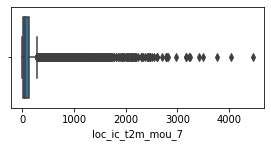

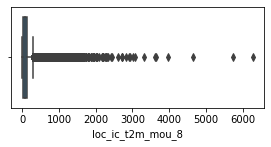

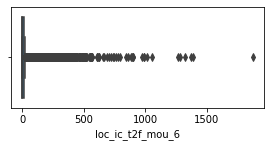

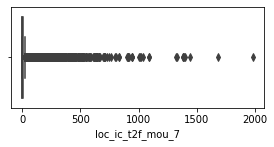

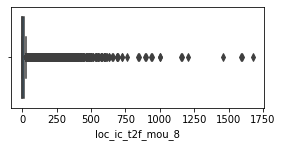

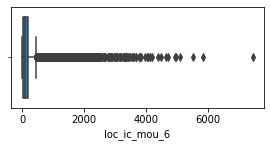

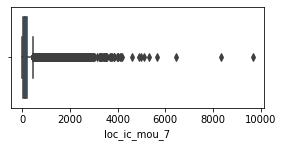

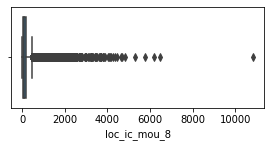

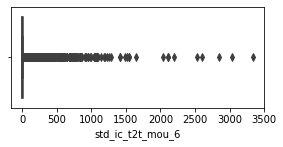

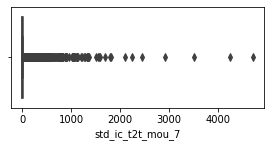

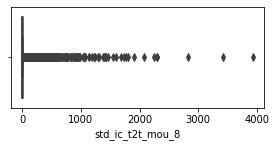

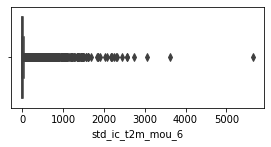

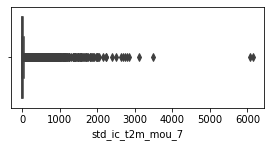

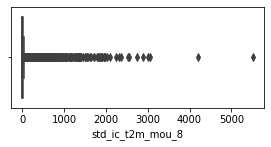

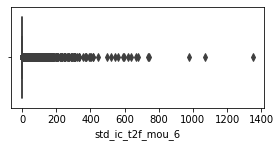

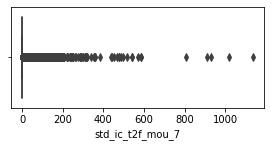

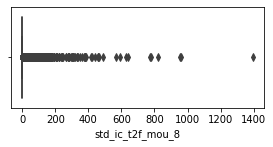

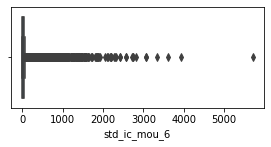

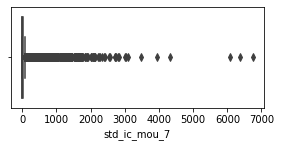

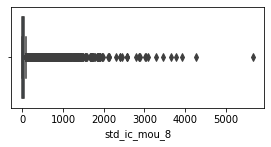

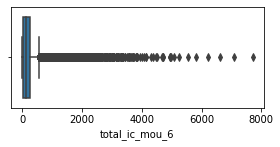

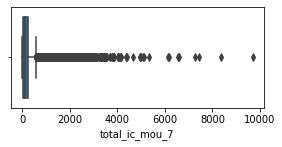

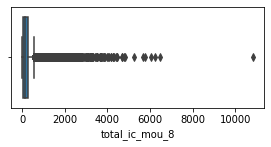

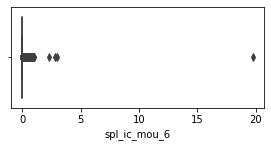

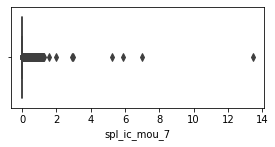

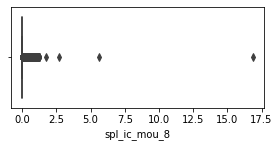

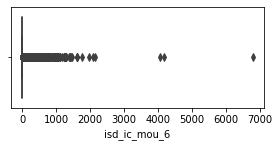

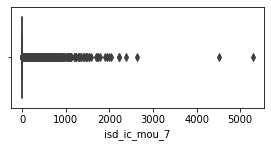

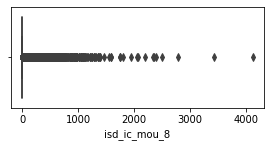

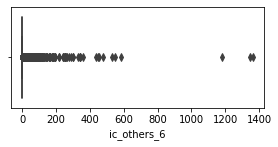

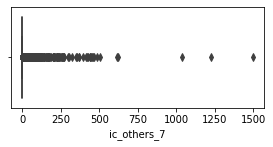

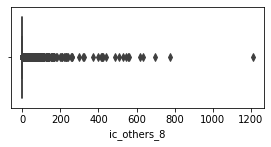

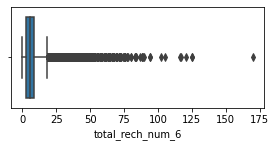

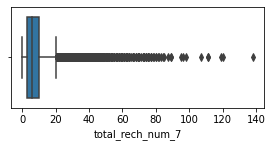

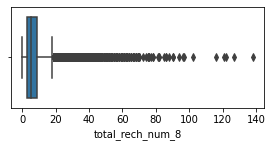

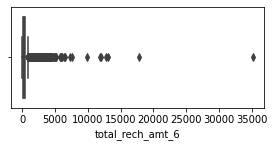

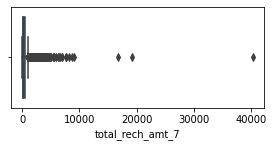

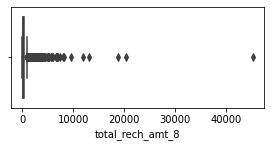

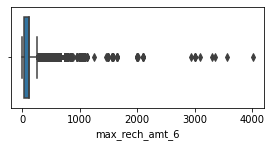

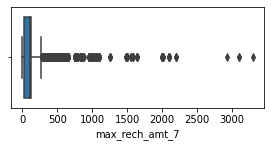

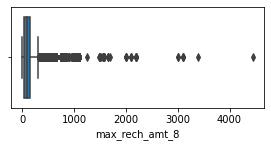

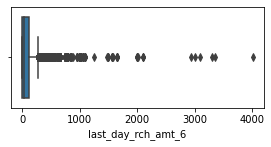

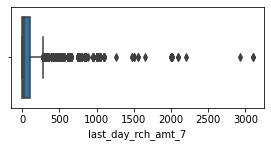

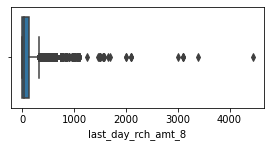

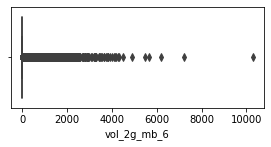

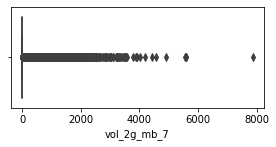

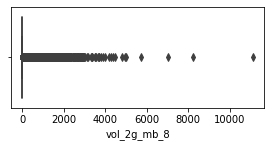

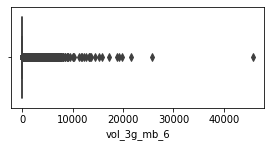

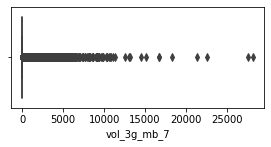

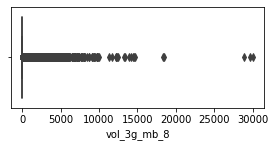

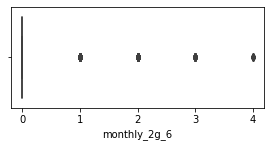

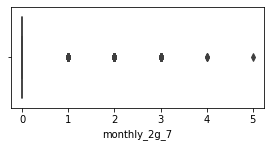

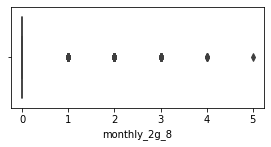

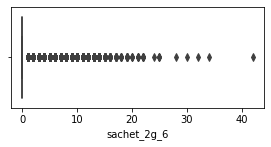

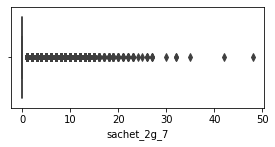

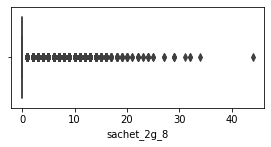

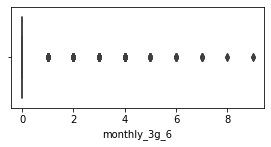

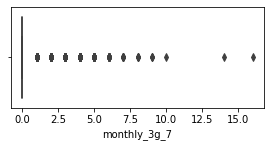

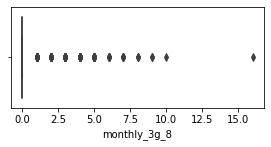

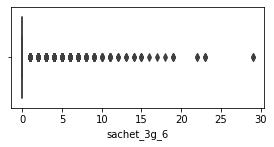

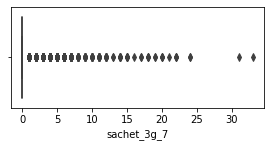

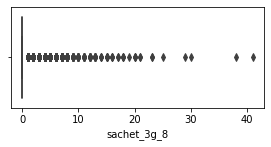

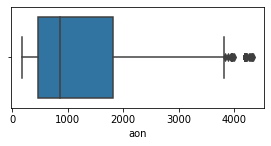

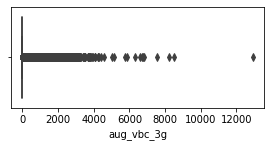

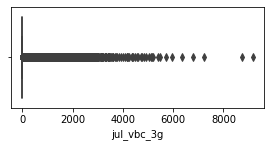

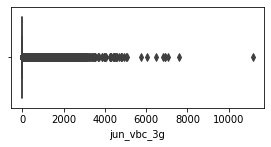

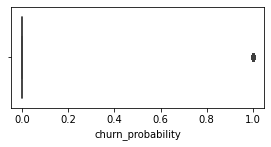

In [23]:
#starting with numerical columns
k=df.shape[1]
j=int(k/3)

for i,col in enumerate(df.describe().columns):
    plt.figure(figsize=(10, 140))
    plt.subplot(63,2,i+1)
    sns.boxplot(data=df,x=col)
plt.show()

##### All columns have some outliers in them. So we wont drop outliers from all columns

In [24]:
#creating list of categorical columns
catcols=[ i for i in df.columns if i not in df.describe().columns ]
len(catcols)

3

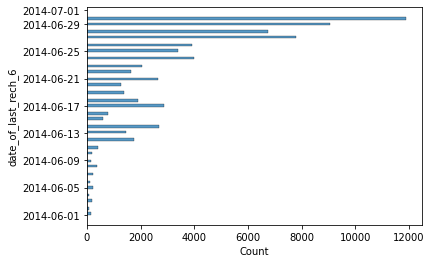

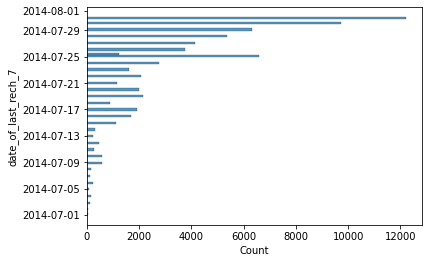

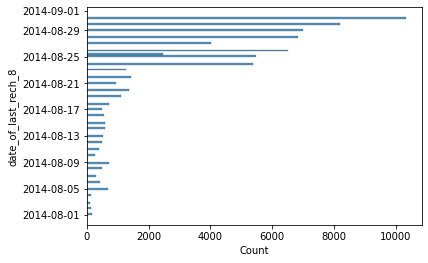

In [25]:
#ploting histplot on all categorical columns
for i in catcols:
    plt.figure(i)
    sns.histplot(data=df,y=i)

##### we can observe here that at the end of each month, the number of records are more.

#### Bivariate Analysis on numeric columns

In [26]:
df.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=128)

<AxesSubplot:>

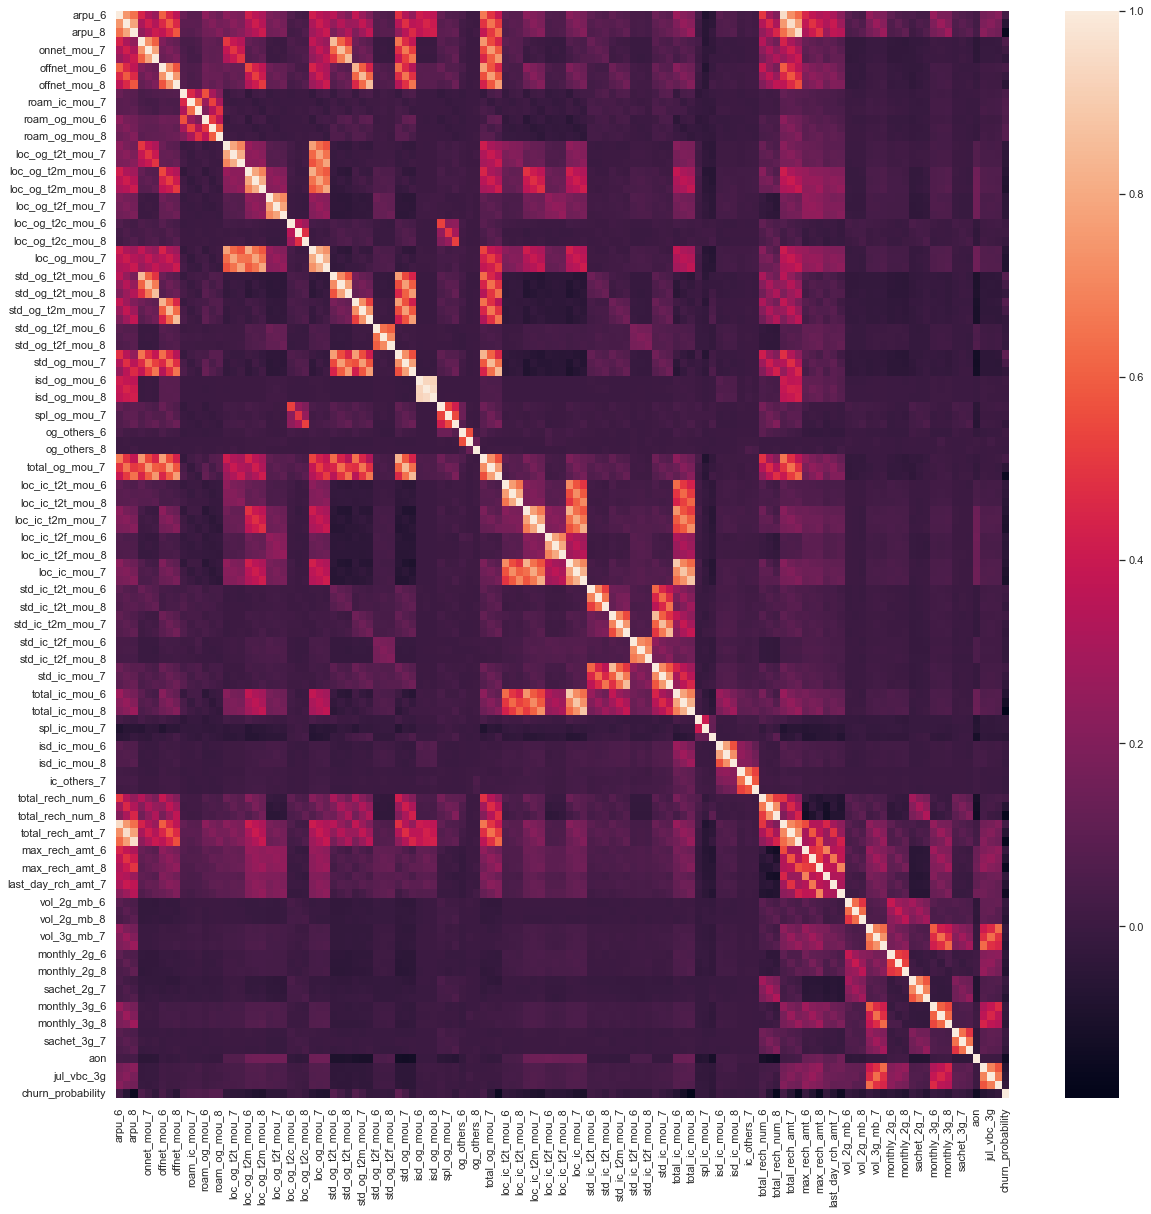

In [36]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(df.corr())

##### The heatmap is not showing all the columns. Let see the correlation with churn_probability column

In [38]:
pd.set_option("display.max_rows", 200)
df.corr()['churn_probability'].sort_values()

total_ic_mou_8       -0.187566
total_rech_num_8     -0.167043
total_rech_amt_8     -0.160455
max_rech_amt_8       -0.159131
arpu_8               -0.157566
total_og_mou_8       -0.149325
last_day_rch_amt_8   -0.139611
aon                  -0.135177
total_ic_mou_7       -0.120197
loc_ic_mou_8         -0.100825
loc_ic_t2m_mou_8     -0.097737
loc_ic_t2m_mou_7     -0.089488
loc_og_t2m_mou_8     -0.088710
loc_ic_mou_7         -0.088386
loc_og_mou_8         -0.085196
loc_og_t2m_mou_7     -0.079998
loc_og_mou_7         -0.078976
monthly_2g_8         -0.076254
max_rech_amt_7       -0.073366
sachet_2g_8          -0.071103
total_ic_mou_6       -0.070951
last_day_rch_amt_7   -0.069795
loc_ic_mou_6         -0.065528
total_rech_amt_7     -0.063978
loc_ic_t2m_mou_6     -0.063888
aug_vbc_3g           -0.063040
total_rech_num_7     -0.062956
vol_2g_mb_8          -0.061752
vol_3g_mb_8          -0.059790
loc_og_t2m_mou_6     -0.058915
monthly_2g_7         -0.058540
loc_og_mou_6         -0.058513
arpu_7  

##### we can observer that  below columns are highly correlated with churn_probability as compared to other columns   
total_ic_mou_8     
total_rech_num_8   
total_rech_amt_8   
max_rech_amt_8     
arpu_8             
total_og_mou_8     
last_day_rch_amt_8 
aon                
total_ic_mou_7     
loc_ic_mou_8   
std_og_mou_6  

##### lets check the higher correlation values

In [39]:
k=df.corr()
k=k[((k>.7) & (k<1)) | ((k<-.5)&(k>-1))]
#dropping rows having all null values in k
k=k.dropna(axis=0,how='all')
k=k.dropna(axis=1,how='all')
k.shape

(74, 74)

<AxesSubplot:>

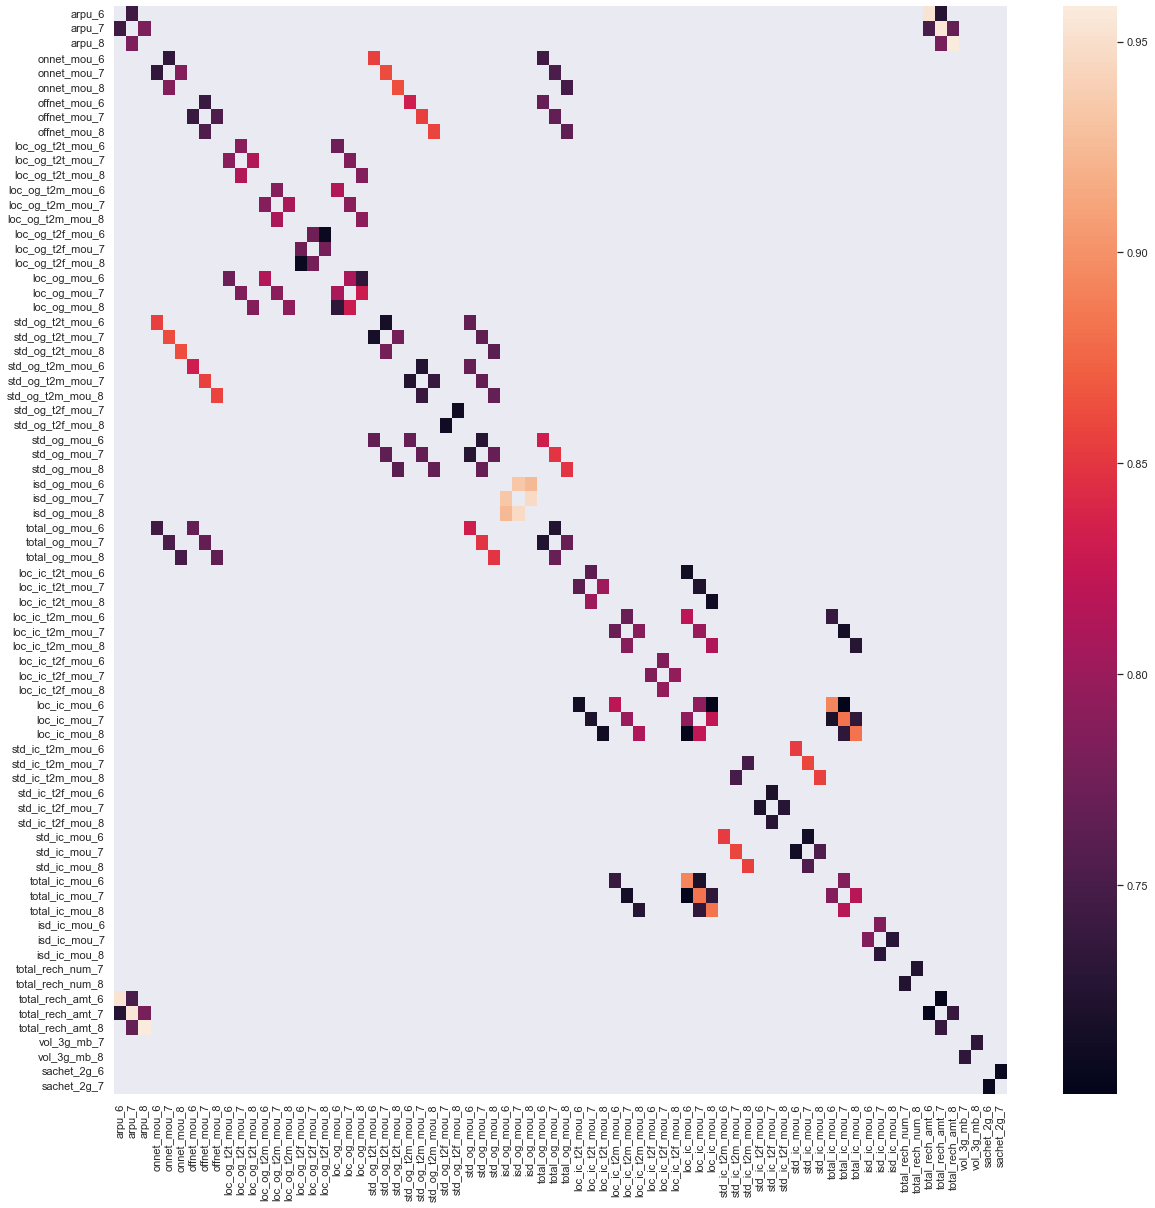

In [40]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(k)

##### We can observer here that the same metric in different months are highly correlated. Multicollinearity exists in data

### Ending Exploratory Data Analysis